In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data = pd.read_csv('merged_2019-07-26.csv')
data.head()

,group_id,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,...,t:admin_logged_in,t:autopay,bookmark_usage:n_bookmarks,any_courses:courses,any_minutes:total_minutes,any_mobile_minutes:mobile_minutes,contract:cost,contract:cost_per_total_user,cost_per_total_user:renewal_price,pay_type_wiretransfer
0,484909,999.00,566,1,1,1141,3,1,899,1,...,0,0,0,3,1141,899,0.0,0.0,998001.000000,0
1,547826,2693.10,365,3,4,3124,10,1,68,3,...,8,8,0,10,3124,68,0.0,0.0,896802.300000,0
2,484909,999.00,566,1,1,460,3,1,358,0,...,0,0,0,3,460,358,0.0,0.0,998001.000000,0
3,561390,12103.72,365,14,12,3905,37,2,38,2,...,0,0,0,37,3905,38,0.0,0.0,863686.877143,0
4,547826,2693.10,365,3,4,3384,14,1,68,3,...,9,9,0,14,3384,68,0.0,0.0,896802.300000,0


In [3]:
use = ([field for field in list(data) if ':' not in field][1:11] 
       + ['renewed'])
use

['cost',
 'subscription_days',
 'total_users',
 'active_users',
 'total_minutes',
 'courses',
 'mobile_users',
 'mobile_minutes',
 'n_exams',
 'exam_member',
 'renewed']

In [4]:
data = data[use]
data.head()

,cost,subscription_days,total_users,active_users,total_minutes,courses,mobile_users,mobile_minutes,n_exams,exam_member,renewed
0,999.00,566,1,1,1141,3,1,899,1,1,0
1,2693.10,365,3,4,3124,10,1,68,3,3,0
2,999.00,566,1,1,460,3,1,358,0,0,0
3,12103.72,365,14,12,3905,37,2,38,2,2,0
4,2693.10,365,3,4,3384,14,1,68,3,3,0


In [5]:
y = data.renewed
X = data.drop('renewed', axis=1)

In [6]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [7]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y, test_size=0.15, random_state=11)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.176, random_state=11)

In [9]:
for obj in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
    print(obj.shape)

(44286, 10)
(9460, 10)
(9485, 10)
(44286,)
(9460,)
(9485,)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
fitted = ridge.predict(X_train)
fitted

array([0.7275024 , 0.54307681, 0.70386757, ..., 0.59260623, 0.69312926,
       0.47409068])

In [17]:
np.linspace(1, 8, 10)

array([1.        , 1.77777778, 2.55555556, 3.33333333, 4.11111111,
       4.88888889, 5.66666667, 6.44444444, 7.22222222, 8.        ])

In [18]:
np.logspace(1, 8, 10)

array([1.00000000e+01, 5.99484250e+01, 3.59381366e+02, 2.15443469e+03,
       1.29154967e+04, 7.74263683e+04, 4.64158883e+05, 2.78255940e+06,
       1.66810054e+07, 1.00000000e+08])

In [21]:
def get_sse(predictions, actual):
     return ((predictions - actual) ** 2).sum()

In [22]:
fitted_sse = get_sse(fitted, y_train)
fitted_sse

10467.680183426284

In [49]:
alphas = np.logspace(3.2, 3.9, 10)
errors = []

#for alpha in alphas:
#    set up clf = Ridge(alpha=alpha)
#    fit on training 
#    predict on valid X data
#    compare predicted validation data to actual y validation (sse)
#    save sse to errors (errors.append(...))

In [50]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    preds = ridge.predict(X_valid)
    sse = get_sse(preds, y_valid)
    errors.append(sse)

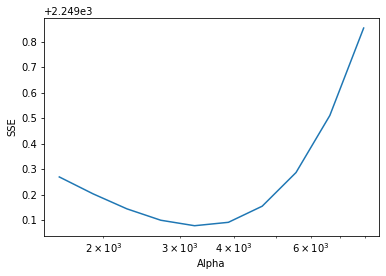

In [51]:
plt.plot(alphas, errors)
plt.xlabel('Alpha')
plt.ylabel('SSE')
plt.xscale('log');

In [52]:
best_alpha = 3e3

In [55]:
final_mod = Ridge(alpha=best_alpha)
final_mod.fit(X_train, y_train)
preds = final_mod.predict(X_test)
get_sse(preds, y_test)

2221.785511283003

In [56]:
final_mod.coef_

array([ 0.00673589,  0.06984269,  0.00069032, -0.00908674,  0.01390389,
        0.0542938 , -0.01467123, -0.01324249,  0.01051187, -0.00623696])

In [57]:
final_mod.intercept_

0.5657544144876485